# VIIRS Spatial LL Investigation

In [ ]:
# imports
import seaborn as sns
from matplotlib import pyplot as plt
import xarray
import h5py 
import pandas as pd

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# imports
from importlib import reload

from ulmo import io as ulmo_io
import numpy as np
from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting
import spatial_plots as sp

sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

## VIIRS Tables

In [2]:
viirs_tbl12 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2012_std.parquet')
viirs_tbl13 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')
viirs_tbl14 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2014_std.parquet')
viirs_tbl15 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2015_std.parquet')
viirs_tbl16 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2016_std.parquet')
viirs_tbl17 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2017_std.parquet')
viirs_tbl18 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2018_std.parquet')
viirs_tbl19 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2019_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2012_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2014_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2015_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2016_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2017_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2018_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2019_std.parquet


In [3]:
len(viirs_tbl12)+len(viirs_tbl13)+len(viirs_tbl14)+len(viirs_tbl15)+len(viirs_tbl16)+len(viirs_tbl17)+len(viirs_tbl18)+len(viirs_tbl19)

8845316

In [5]:
list_viirs = [viirs_tbl12,viirs_tbl13,viirs_tbl14,viirs_tbl15,viirs_tbl16,viirs_tbl17,viirs_tbl18,viirs_tbl19]
LLs = []
datetime = []
dt = []

for i in list_viirs:
    LLs.append(i.LL.values)
    datetime.append(i.datetime)
    dt.append(i.Tmax-i.Tmin)
    
all_viirs = np.concatenate(LLs[0:9])
all_viirs_date = np.concatenate(datetime[0:9])
dates = pd.DatetimeIndex(all_viirs_date)
dt =  np.concatenate(dt[0:9])
N10 = int(np.round(0.1*len(all_viirs)))


print(all_viirs[0:N10])
print(all_viirs_date)
print(dt)

[  152.32068     98.993835   183.89246  ...  -781.75476  -1182.9355
  -350.2193  ]
['2012-02-01T00:00:00.000000000' '2012-02-01T00:00:00.000000000'
 '2012-02-01T00:00:00.000000000' ... '2019-12-31T23:40:00.000000000'
 '2019-12-31T23:40:00.000000000' '2019-12-31T23:40:00.000000000']
[3.5500183 4.3099976 3.730011  ... 2.619995  2.8399963 2.8399963]


# VIIRS 2012
## 0 < DT < 0.5
### 10 bins

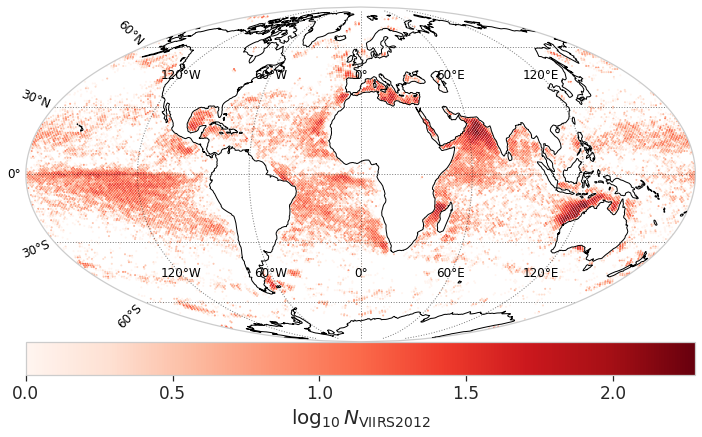

In [38]:
dt = ((viirs_tbl12.T90-viirs_tbl12.T10) > 0.25) & ((viirs_tbl12.T90-viirs_tbl12.T10) < 0.45)

_ = ulmo_figs.show_spatial(viirs_tbl12[dt], lbl='VIIRS 2012')

(-250.0, 1000.0)

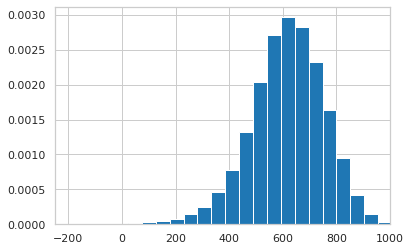

In [34]:
plt.hist(viirs_tbl12[dt].LL.values, bins=60,density=True)
plt.xlim(-250,1000)
#plt.vlines(675,0,.0025)
#plt.xlabel('LL Value')
#plt.ylabel('Density')
#plt.title('Histogram of LL Values with 1<DT<1.5')


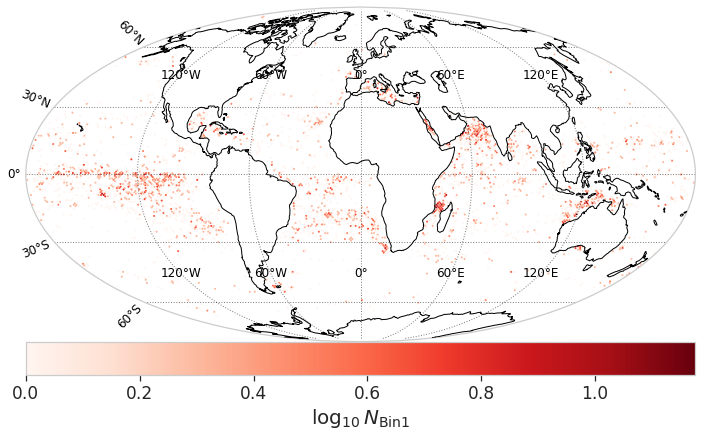

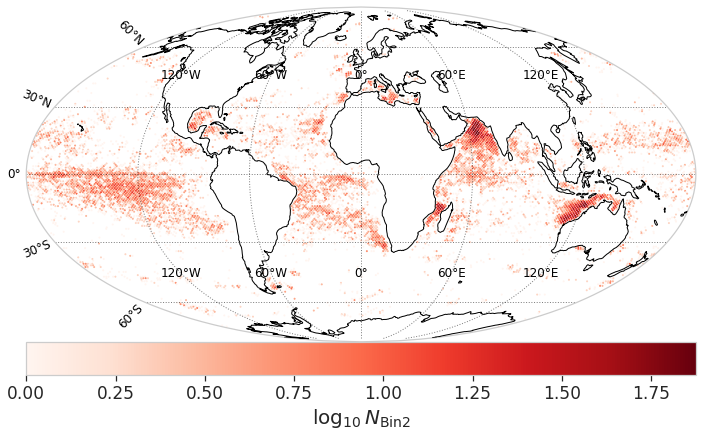

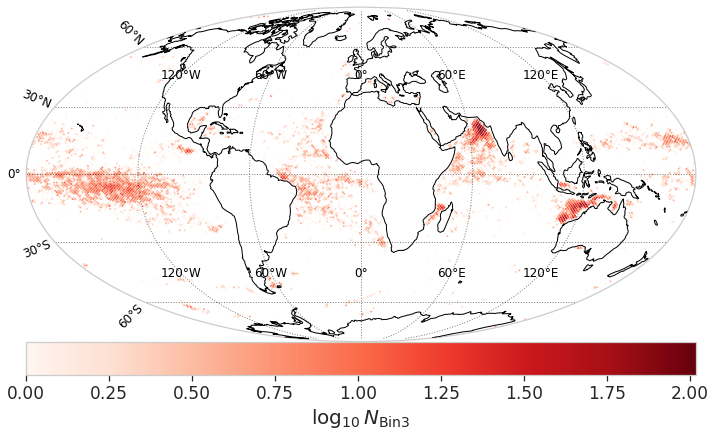

In [35]:
binbin = np.array([0,450,675,1000])
for i in range(1,len(binbin)):    
    bin2 = ((viirs_tbl12[dt].LL.values) > binbin[i-1]) & ((viirs_tbl12[dt].LL.values) < binbin[i])
    _ = ulmo_figs.show_spatial(viirs_tbl12[dt][bin2], lbl='Bin'+str(i))
    
   

In [ ]:
dt = ((viirs_tbl.T90-viirs_tbl.T10) > 0.25) & ((viirs_tbl.T90-viirs_tbl.T10) < 0.45)

_ = ulmo_figs.show_spatial(viirs_tbl[dt], lbl='VIIRS')

In [ ]:
low = ((viirs_tbl.T90 - viirs_tbl.T10 ) > 1) & ((viirs_tbl.T90 - viirs_tbl.T10 ) < 1.5) & ((viirs_tbl.LL)>0) & ((viirs_tbl.LL)<200)
high = ((viirs_tbl.T90 - viirs_tbl.T10 ) > 1) & ((viirs_tbl.T90 - viirs_tbl.T10 ) < 1.5) & ((viirs_tbl.LL)>400) & ((viirs_tbl.LL)<600)